In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import plotly.express as px

# Load datasets

In [4]:
apps_df = pd.read_csv('apps.csv')

In [7]:
reviews_df = pd.read_csv('user_reviews.csv', on_bad_lines='skip')

# Data Cleaning

In [9]:
apps_df.dropna(inplace=True)
apps_df['Size'] = apps_df['Size'].astype(str).replace('Varies with device', np.nan)
apps_df['Size'] = apps_df['Size'].str.replace('M', '').str.replace('k', '').replace(' ', '')
apps_df['Size'] = apps_df['Size'].astype(float) * apps_df['Size'].str.contains('k').map({True: 1/1024, False: 1})
apps_df['Price'] = apps_df['Price'].str.replace('$', '').astype(float)
apps_df['Reviews'] = apps_df['Reviews'].astype(int)

# Data Types

In [10]:
print(apps_df.dtypes)

Unnamed: 0          int64
App                object
Category           object
Rating            float64
Reviews             int64
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


# Category Exploration

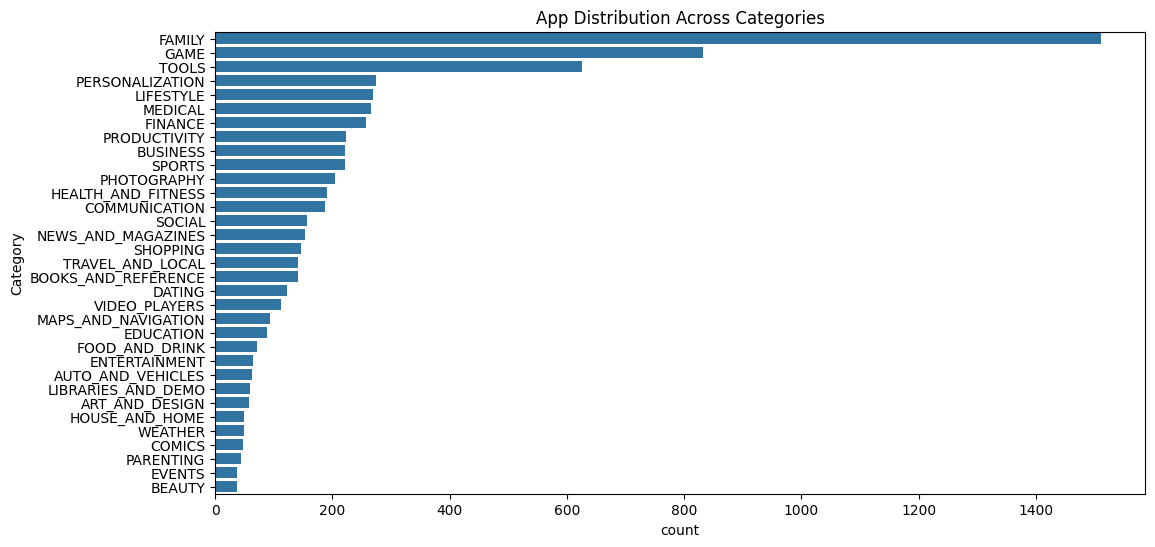

In [11]:
plt.figure(figsize=(12, 6))
sns.countplot(y='Category', data=apps_df, order=apps_df['Category'].value_counts().index)
plt.title('App Distribution Across Categories')
plt.show()

# Metrics Analysis

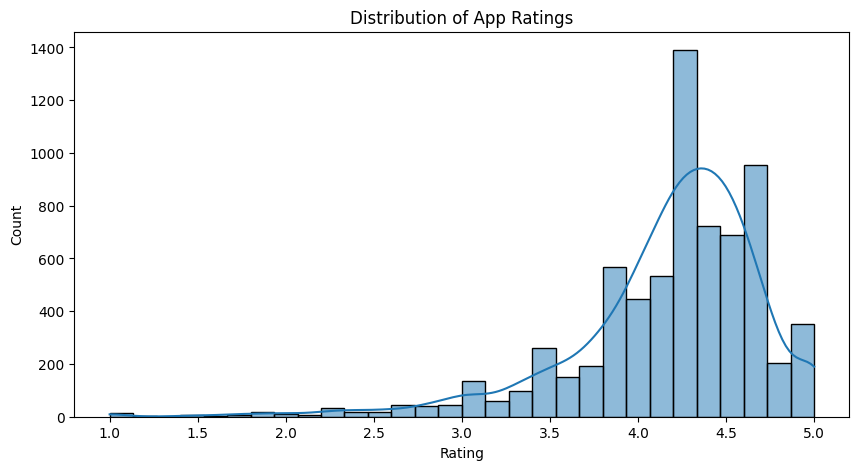

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(apps_df['Rating'].dropna(), bins=30, kde=True)
plt.title('Distribution of App Ratings')
plt.show()

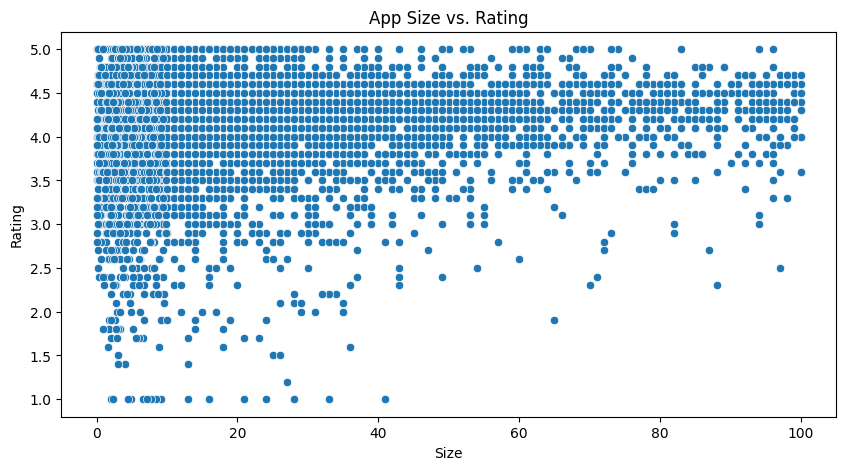

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Size', y='Rating', data=apps_df)
plt.title('App Size vs. Rating')
plt.show()

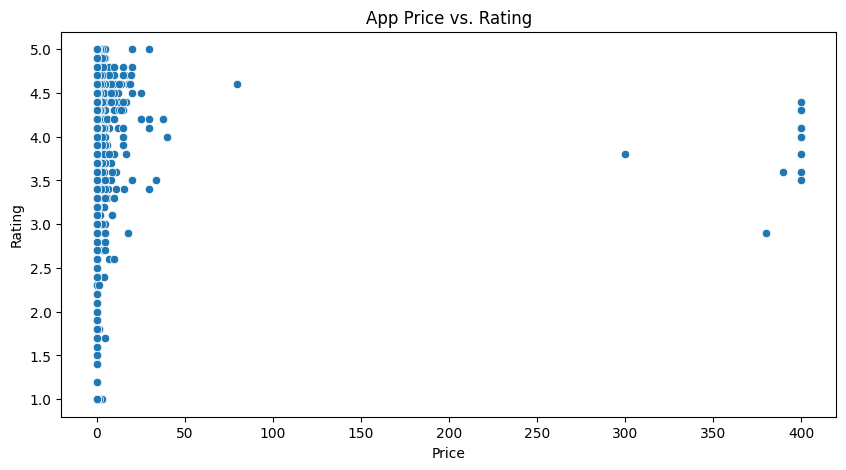

In [14]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Price', y='Rating', data=apps_df)
plt.title('App Price vs. Rating')
plt.show()

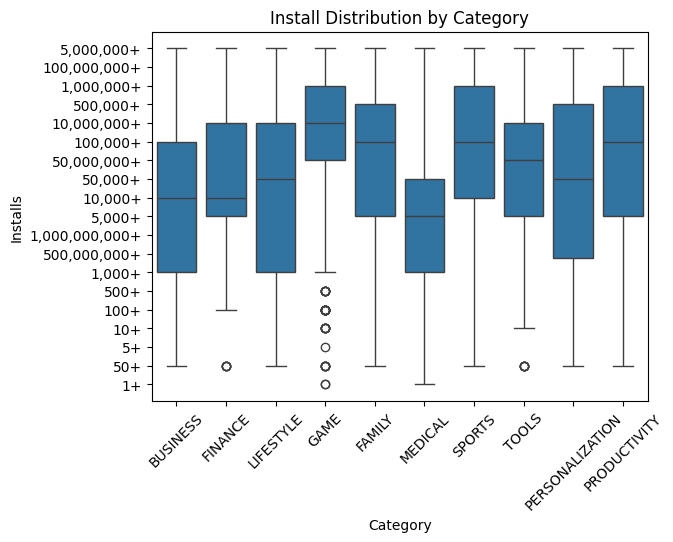

In [15]:
top_categories = apps_df['Category'].value_counts().head(10).index
popular_apps = apps_df[apps_df['Category'].isin(top_categories)]
sns.boxplot(x='Category', y='Installs', data=popular_apps)
plt.title('Install Distribution by Category')
plt.xticks(rotation=45)
plt.show()

# Sentiment Analysis

In [17]:
reviews_df['Sentiment_Polarity'] = reviews_df['Translated_Review'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

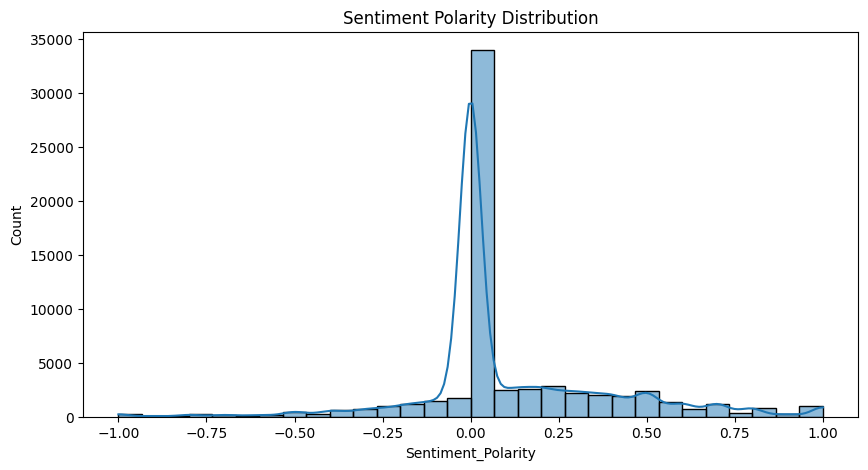

In [18]:
plt.figure(figsize=(10, 5))
sns.histplot(reviews_df['Sentiment_Polarity'], bins=30, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.show()

# Interactive Visualization

In [19]:
fig = px.scatter(apps_df, x='Size', y='Rating', color='Category', hover_data=['App'])
fig.update_layout(title='Interactive Size vs. Rating')
fig.show()

In [21]:
category_counts = apps_df['Category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

In [22]:
fig = px.bar(category_counts, x='Category', y='Count', title='App Distribution Across Categories')
fig.show()